# Cardiovascular Disease dataset
- Kaggle link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
- The dataset consists of 70 000 records of patients data, 11 features + target.

## Description
**Data description**

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

**Features:**

- **Age** | Objective Feature | **age** | int (days)
- **Height** | Objective Feature | **height** | int (cm) |
- **Weight** | Objective Feature | **weight** | float (kg) |
- **Gender** | Objective Feature | **gender** | categorical code |
- **Systolic blood pressure** | Examination Feature | **ap_hi** | int |
- **Diastolic blood pressure** | Examination Feature | **ap_lo** | int |
- **Cholesterol** | Examination Feature | **cholesterol** | 1: normal, 2: above normal, 3: well above normal |
- **Glucose** | Examination Feature | **gluc** | 1: normal, 2: above normal, 3: well above normal |
- **Smoking** | Subjective Feature | **smoke** | binary |
- **Alcohol intake** | Subjective Feature | **alco** | binary |
- **Physical activity** | Subjective Feature | **active** | binary |
- **Presence or absence of cardiovascular disease** | Target Variable | **cardio** | binary |

All of the dataset values were collected at the moment of medical examination.

In [5]:
import sys
sys.path.append('..')
print(sys.path)

['/home/jupyter/controllable-ai/healthcare', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jupyter/.ipython', '..', '..']


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys
sys.path.append('..')

import gc
import os
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import utils


df = pd.read_csv(os.path.join('data', 'cardio_train.csv'), delimiter=';')
df = df.drop(['id'], axis=1)

y = df['cardio']
X = df.drop(['cardio'], axis=1)

print("Target class ratio:")
print("# of cardio=1: {}/{} ({:.2f}%)".format(np.sum(y==1), len(y), 100*np.sum(y==1)/len(y)))
print("# of cardio=0: {}/{} ({:.2f}%)".format(np.sum(y==0), len(y), 100*np.sum(y==0)/len(y)))


from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

column_trans = ColumnTransformer(
    [('age_norm', StandardScaler(), ['age']),
     ('height_norm', StandardScaler(), ['height']),
     ('weight_norm', StandardScaler(), ['weight']),
     ('gender_cat', OneHotEncoder(), ['gender']),
     ('ap_hi_norm', StandardScaler(), ['ap_hi']),
     ('ap_lo_norm', StandardScaler(), ['ap_lo']),
     ('cholesterol_cat', OneHotEncoder(), ['cholesterol']),
     ('gluc_cat', OneHotEncoder(), ['gluc']),
     ('smoke_cat', OneHotEncoder(), ['smoke']),
     ('alco_cat', OneHotEncoder(), ['alco']),
     ('active_cat', OneHotEncoder(), ['active']),
    ], remainder='passthrough'
)


X = column_trans.fit_transform(X)
X_np = X.copy()


seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_true = y_test.copy()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Target class ratio:
# of cardio=1: 34979/70000 (49.97%)
# of cardio=0: 35021/70000 (50.03%)


In [3]:
X

array([[-0.43606151,  0.44345206, -0.84787326, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.30768633, -1.01816804,  0.74983117, ...,  0.        ,
         0.        ,  1.        ],
       [-0.24799666,  0.07804703, -0.70894244, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.16328642,  2.27047718,  2.13913938, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.20058905, -0.16555632, -0.15321916, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.43414373,  0.68705541, -0.15321916, ...,  0.        ,
         0.        ,  1.        ]])

## Simple baselines

In [37]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, precision_score, recall_score, precision_recall_curve, accuracy_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from utils_cardio import *

    


fpr_dict = dict()
tpr_dict = dict()
roc_auc_dict = dict()
acc_dict = dict()
prec_dict = dict()
recall_dict = dict()
model_types = []

#### Logistic regression
model_type = 'logistic'
if model_type not in model_types:
    model_types.append(model_type)
log_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

y_score = log_model.predict_proba(X_test)[:,1]    # probability of positive class
y_pred = log_model.predict(X_test)

acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))


#### KNN
model_type = 'knn'
if model_type not in model_types:
    model_types.append(model_type)
knn_model = KNeighborsClassifier().fit(X_train, y_train)

y_score = knn_model.predict_proba(X_test)[:,1]
y_pred = knn_model.predict(X_test)

acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))

#### DecisionTree
model_type = 'dtree'
if model_type not in model_types:
    model_types.append(model_type)
dt_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

y_score = dt_model.predict_proba(X_test)[:, 1]
y_pred = dt_model.predict(X_test)

acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))

#### SVM
# model_type = 'svm'
# model_types.append(model_type)
# svm_model = SVC(kernel="linear", probability=True).fit(X_train, y_train)

# y_score = svm_model.predict_proba(X_test)[:,1]
# y_pred = svm_model.predict(X_test)

# acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
# print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))


#### MLP
model_type = 'mlp'
if model_type not in model_types:
    model_types.append(model_type)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

mlpc_model = MLPClassifier().fit(X_train_scale, y_train)

y_score = mlpc_model.predict_proba(X_test_scale)[:,1]
y_pred = mlpc_model.predict(X_test_scale)

acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))

[logistic] Accuracy: 72.22 %
[knn] Accuracy: 64.91 %
[dtree] Accuracy: 72.97 %
[mlp] Accuracy: 74.07 %


In [ ]:
# model_type = 'svm'
# model_types.append(model_type)
# svm_model = SVC(kernel="linear", probability=True).fit(X_train, y_train)

# y_score = svm_model.predict_proba(X_test)[:,1]
# y_pred = svm_model.predict(X_test)

# acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
# print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))

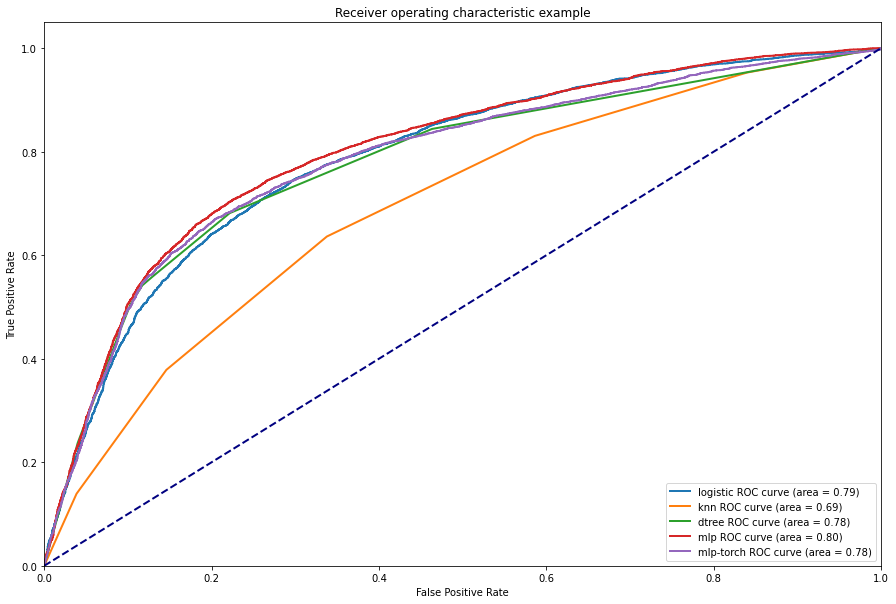

In [60]:
plt.figure(figsize=(15,10))
lw = 2
for model_type in model_types:
    plt.plot(fpr_dict[model_type], tpr_dict[model_type], lw=lw, label='{} ROC curve (area = %0.2f)'.format(model_type) % roc_auc_dict[model_type])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
mlpc_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [42]:
mlpc_model.out_activation_

'logistic'

## Rule check

In [32]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


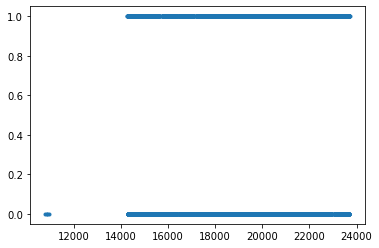

In [34]:
x1 = df['age']
target = df['cardio']

plt.plot(x1, target, '.')

## torch

In [59]:
'''
Data preprocessing for NN
'''
import random
import torch
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

from copy import deepcopy
from model import RuleEncoder, DataEncoder, Net, NaiveModel, SharedNet, DataonlyNet


def get_correct_results(out, label_Y):
    y_pred_tag = torch.round(out)    # Binary label
    return (y_pred_tag == label_Y).sum().float()


seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 70:10:20 split
train_X, valid_X, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)
test_X, test_y = X_test.copy(), y_test.copy()

train_X, train_y = torch.tensor(train_X, dtype=torch.float32, device=device), torch.tensor(train_y, dtype=torch.float32, device=device)
valid_X, valid_y = torch.tensor(valid_X, dtype=torch.float32, device=device), torch.tensor(valid_y, dtype=torch.float32, device=device)
test_X, test_y = torch.tensor(test_X, dtype=torch.float32, device=device), torch.tensor(test_y, dtype=torch.float32, device=device)

total_train_sample = len(train_X)
total_valid_sample = len(valid_X)
total_test_sample = len(test_X)

batch_size = 64
train_loader = DataLoader(TensorDataset(train_X, train_y), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(TensorDataset(valid_X, valid_y), batch_size=valid_X.shape[0])
test_loader = DataLoader(TensorDataset(test_X, test_y), batch_size=test_X.shape[0])

print("data size: {}/{}/{}".format(len(train_X), len(valid_X), len(test_X)))

lr = 0.001
input_dim = train_X.shape[1]
output_dim = 1
l1_coeff = 1e-6
        
model = nn.Sequential(nn.Linear(input_dim, 100),
                      nn.ReLU(),
                      nn.Linear(100, output_dim),
                      nn.Sigmoid())
model.to(device)
        
total_params = sum(p.numel() for p in model.parameters())
print("total parameters: {}".format(total_params))

loss_rule_func = lambda x,y: torch.mean(F.relu(x-y))    # if x>y, penalize it.
loss_task_func = nn.L1Loss()    # return scalar (reduction=mean)
# loss_task_func = nn.BCELoss()
l1_func = nn.L1Loss()
best_val_loss = float('inf')
opt = optim.Adam(model.parameters(), lr=lr)
# opt = optim.SGD(model.parameters(), lr=lr)

epochs = 1000
early_stopping_thld = 10
counter_early_stopping = 1
log_interval = 500
valid_freq = 5

model_type = 'mlp-torch'
saved_filename = 'cardio-{}-seed{}.demo.pt'.format(model_type, seed)
saved_filename =  os.path.join('saved_models', saved_filename)
print('saved_filename: {}\n'.format(saved_filename))



print("Before learning...")
with torch.no_grad():
    loss_cm = 0
    correct_results_sum = 0
    total_cm_samples = 0
    for val_X, val_Y in valid_loader:
        
        out = model(val_X)
        
        loss_bce = loss_task_func(out, val_Y.unsqueeze(-1))

        loss_cm += (loss_bce.item() * out.numel())
        total_cm_samples += out.numel()
        correct_results_sum += get_correct_results(out.squeeze(), val_Y)
        
    loss_cm /= total_cm_samples
    acc = correct_results_sum / total_cm_samples

    print("[Valid] BCE loss: {:.5f}, Accuracy: {:.3f}\n".format(loss_cm, acc))



print("Start learning...")
epochs = 1000
max_patience = 10
best_val_loss = np.float('inf')
for epoch in range(1, epochs+1):
    epoch_loss_cm = 0
    correct_results_sum = 0
    total_cm_samples = 0
    for batch_train_X, batch_train_Y in train_loader:
        
        opt.zero_grad()
        
        out = model(batch_train_X)
        
        loss_bce = loss_task_func(out, batch_train_Y)
        
        regularization_loss = 0
        for param in model.parameters():
            regularization_loss += torch.sum(torch.abs(param))
        
        loss = loss_bce + l1_coeff * regularization_loss
        loss.backward()
        opt.step()
        
        epoch_loss_cm += (loss_bce.item() * out.numel())
        total_cm_samples += out.numel()
        correct_results_sum += get_correct_results(out.squeeze(), batch_train_Y)
        
    epoch_loss_cm /= total_cm_samples
    acc = correct_results_sum / total_cm_samples
        
    print("[Train] Epoch {}/{}, BCE loss: {:.5f}, Accuracy: {:.3f}".format(epoch, epochs, epoch_loss_cm, acc))
        
    if epoch % 1 == 0 or epoch == 1:
        
        with torch.no_grad():
            loss_cm = 0
            correct_results_sum = 0
            total_cm_samples = 0
            for val_X, val_Y in valid_loader:
                
                out = model(val_X)
        
                loss_bce = loss_task_func(out, val_Y.unsqueeze(-1))

                loss_cm += (loss_bce.item() * out.numel())
                total_cm_samples += out.numel()
                correct_results_sum += get_correct_results(out.squeeze(), val_Y)


            loss_cm /= total_cm_samples
            acc = correct_results_sum / total_cm_samples
            
            if loss_cm < best_val_loss:
                best_val_loss = loss_cm
                best_epoch = epoch
                best_model_state_dict = deepcopy(model.state_dict())
                torch.save(best_model_state_dict, 'saved_model/{}.ckpt.test'.format(model_type))

                print("[Valid] BCE loss: {:.5f}, Accuracy: {:.3f}\t**best model is updated.**"
                      .format(loss_cm, acc))
            else:
                print("[Valid] BCE loss: {:.5f}, Accuracy: {:.3f}\t(not decreasing for {}/{})"
                      .format(loss_cm, acc, not_decreasing_for, max_patience))

            not_decreasing_for = epoch - best_epoch

            if not_decreasing_for > max_patience:
                break
                
                
print()
print('After learning...')
model.load_state_dict(best_model_state_dict)
with torch.no_grad():
    loss_cm = 0
    correct_results_sum = 0
    total_cm_samples = 0
    y_true, y_score = [], []
    for te_X, te_Y in test_loader:
        
        out = model(te_X)
        
        loss_bce = loss_task_func(out, te_Y.unsqueeze(-1))

        loss_cm += (loss_bce.item() * out.numel())
        y_true += te_Y.view(-1,).tolist()
        y_score += out.view(-1,).tolist()
        total_cm_samples += out.numel()
        
loss_cm /= total_cm_samples
y_true = np.array(y_test)
y_score = np.array(y_score)
y_pred = np.round(np.array(y_score))    # classification

if model_type not in model_types:
    model_types.append(model_type) 
acc_dict[model_type], prec_dict[model_type], recall_dict[model_type], fpr_dict[model_type], tpr_dict[model_type], roc_auc_dict[model_type] = get_metrics(y_true, y_pred, y_score)
print('[{}] Accuracy: {:.2f} %'.format(model_type, 100*acc_dict[model_type]))

data size: 50400/5600/14000
total parameters: 2101
saved_filename: saved_models/cardio-mlp-torch-seed42.demo.pt

Before learning...
[Valid] BCE loss: 0.49753, Accuracy: 0.562

Start learning...
[Train] Epoch 1/1000, BCE loss: 0.49974, Accuracy: 0.580
[Valid] BCE loss: 0.45491, Accuracy: 0.552	**best model is updated.**
[Train] Epoch 2/1000, BCE loss: 0.49888, Accuracy: 0.596
[Valid] BCE loss: 0.43521, Accuracy: 0.566	**best model is updated.**
[Train] Epoch 3/1000, BCE loss: 0.49838, Accuracy: 0.556
[Valid] BCE loss: 0.43095, Accuracy: 0.563	**best model is updated.**
[Train] Epoch 4/1000, BCE loss: 0.49834, Accuracy: 0.543
[Valid] BCE loss: 0.41870, Accuracy: 0.588	**best model is updated.**
[Train] Epoch 5/1000, BCE loss: 0.49805, Accuracy: 0.578
[Valid] BCE loss: 0.40850, Accuracy: 0.599	**best model is updated.**
[Train] Epoch 6/1000, BCE loss: 0.49774, Accuracy: 0.608
[Valid] BCE loss: 0.39218, Accuracy: 0.617	**best model is updated.**
[Train] Epoch 7/1000, BCE loss: 0.49788, Acc

In [44]:
model

Sequential(
  (0): Linear(in_features=19, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
  (3): Sigmoid()
)

In [50]:
regularization_loss = 0
for param in model.parameters():
    regularization_loss += torch.sum(torch.abs(param))

In [56]:
regularization_loss

tensor(65.4434, device='cuda:0', grad_fn=<AddBackward0>)

In [61]:
acc_dict

{'logistic': 0.7222142857142857,
 'knn': 0.6491428571428571,
 'dtree': 0.7297142857142858,
 'mlp': 0.7407142857142858,
 'mlp-torch': 0.7324285714285714}

In [66]:
roc_auc_dict

{'logistic': 0.7866204851704054,
 'knn': 0.6924500553634281,
 'dtree': 0.7785489818582325,
 'mlp': 0.8002411476474542,
 'mlp-torch': 0.7841632126429106}

In [88]:
acc

tensor(0.7004, device='cuda:0')